# Prosper Loan Data Exploration
## by Roger McClain

## Preliminary Wrangling

> For this Data Exploration I will be taking a look at the Prosper Load Data set, which contains data about 113,937 loans with 81 variables for each of them. This includes things like loan amount, interest rate, current loan status, borrower income, etc. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

c:\users\yarr\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# take a look at the structure of the data set
loan_df.shape

(113937, 81)

In [4]:
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [4]:
df = loan_df.copy()

##### I can already tell that this dataset is to large to comfortably deal with in one dataframe, so I may need to break it into a smaller dataframes with some variables of interest

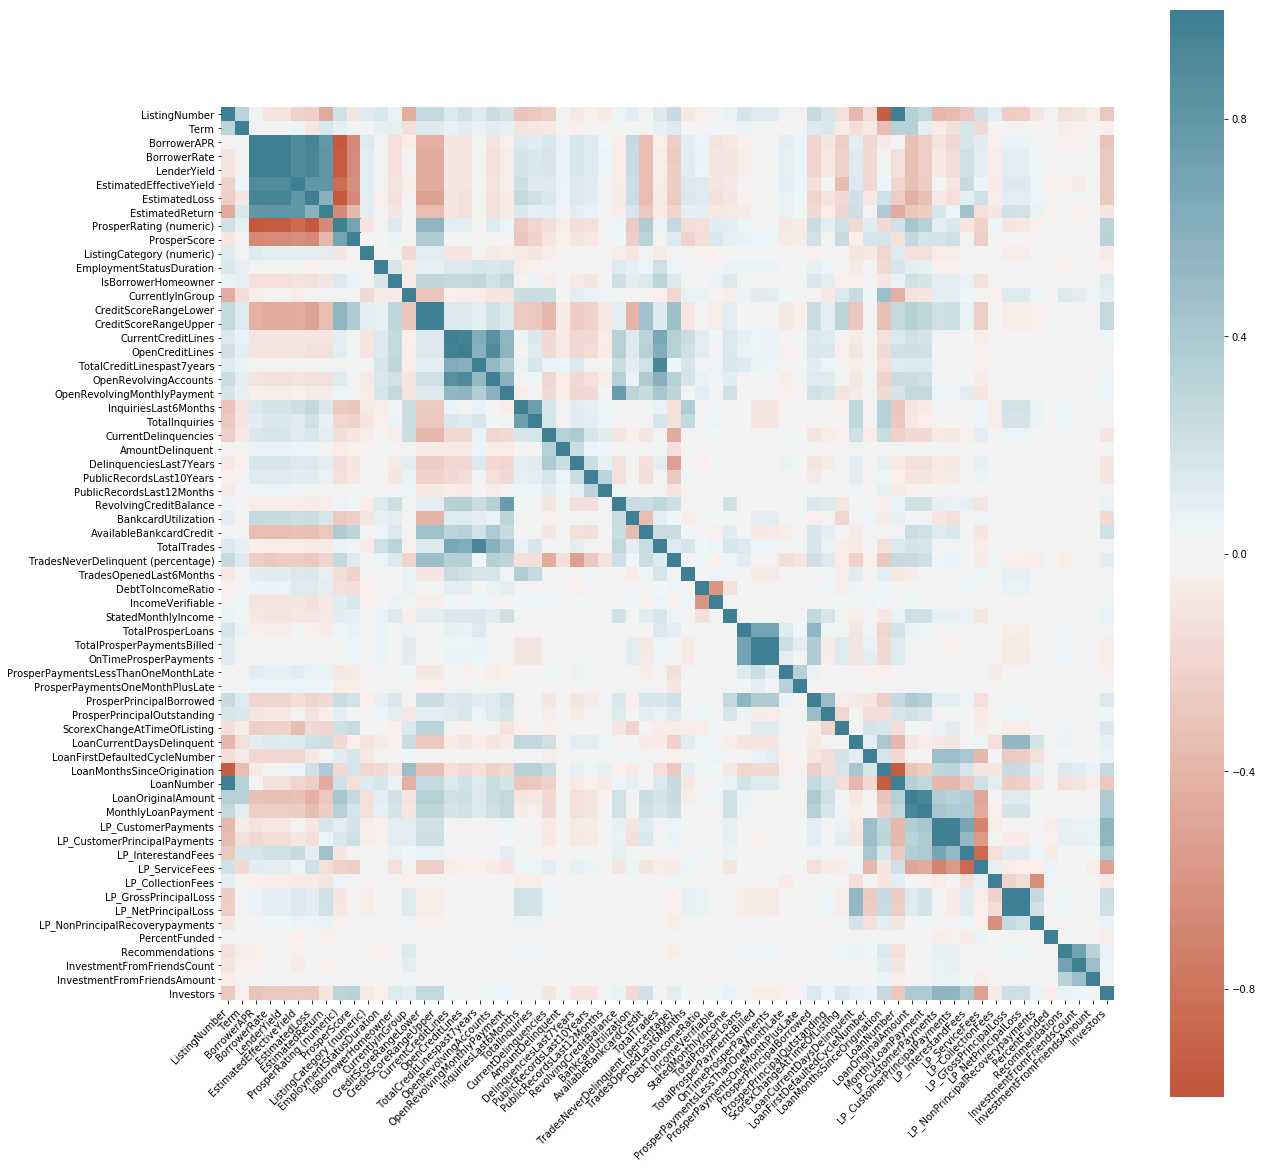

In [6]:
# lets make a heatmap to see if we notice any obvious relationships
corr = df.corr()
plt.figure(figsize=(20,20))
ax = sb.heatmap(corr, vmin = -1, vmax = 1, center = 0,cmap = sb.diverging_palette(20, 220, n = 200),
    square = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

##### Kind of interesting, but obviously difficult to see what is happening in a heatmap of this size

In [7]:
bar = abs(corr)
filtered_corr = bar[bar > 0.5]
filtered_corr = filtered_corr[filtered_corr < 1.0].dropna(how = 'all')
filtered_corr

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingNumber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BorrowerAPR,NaN,NaN,NaN,0.989824,0.989329,0.895635,0.949538,0.794275,0.962151,0.668287,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BorrowerRate,NaN,NaN,0.989824,NaN,0.999211,0.895282,0.945297,0.817670,0.953105,0.649736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LenderYield,NaN,NaN,0.989329,0.999211,NaN,0.895343,0.945308,0.817654,0.953119,0.649783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EstimatedEffectiveYield,NaN,NaN,0.895635,0.895282,0.895343,NaN,0.798135,0.801568,0.848394,0.632003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EstimatedLoss,NaN,NaN,0.949538,0.945297,0.945308,0.798135,NaN,0.591056,0.964182,0.673727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EstimatedReturn,NaN,NaN,0.794275,0.817670,0.817654,0.801568,0.591056,NaN,0.659980,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProsperRating (numeric),NaN,NaN,0.962151,0.953105,0.953119,0.848394,0.964182,0.659980,NaN,0.705221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProsperScore,NaN,NaN,0.668287,0.649736,0.649783,0.632003,0.673727,NaN,0.705221,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScoreRangeLower,NaN,NaN,NaN,NaN,NaN,NaN,0.511263,NaN,0.548874,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


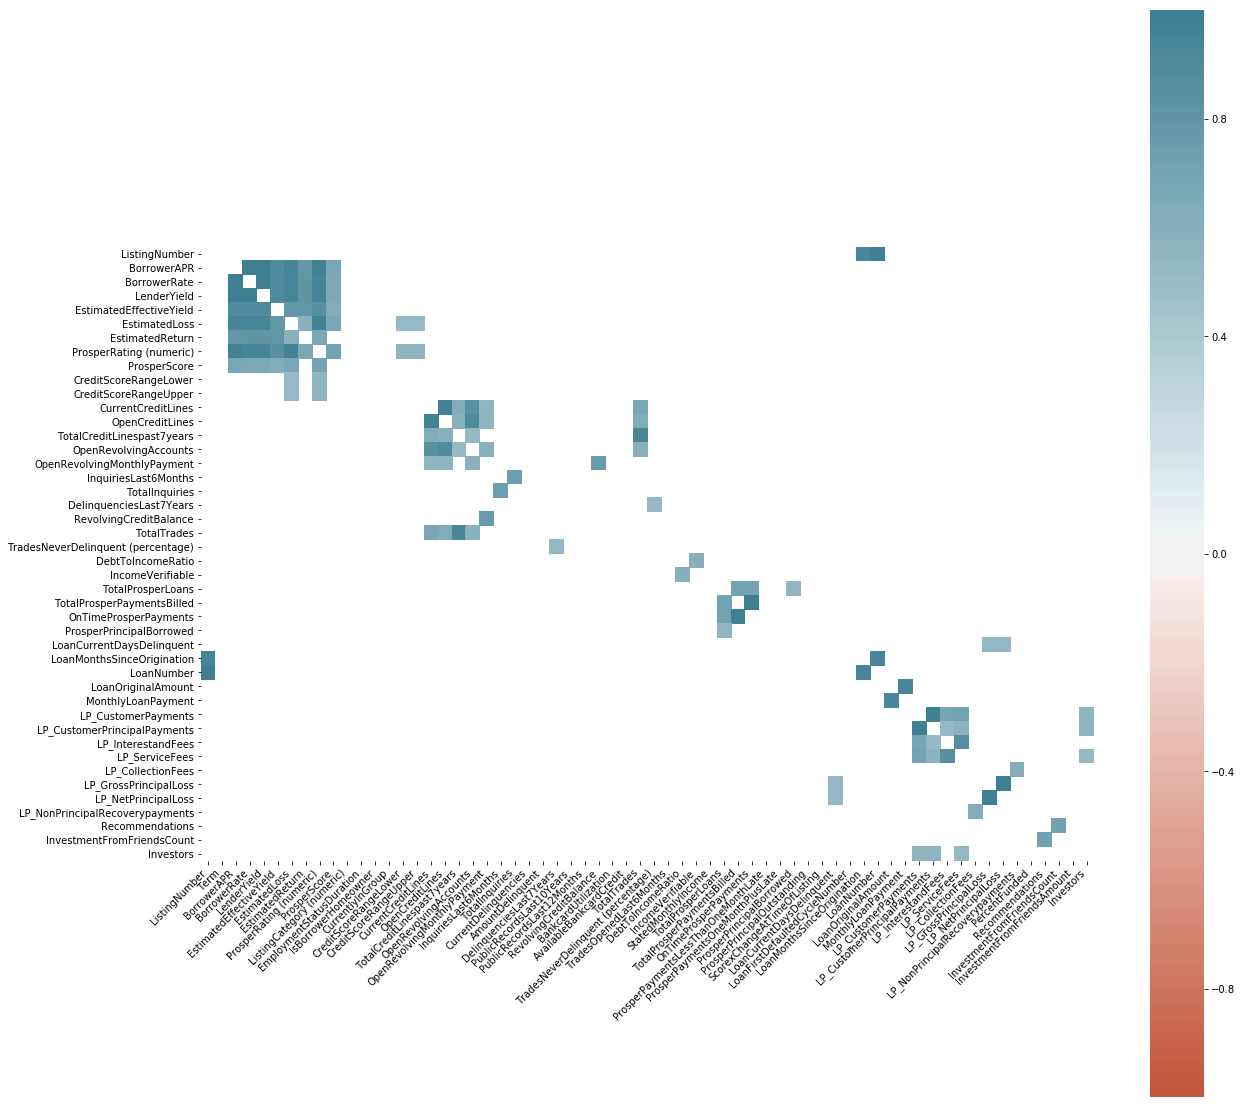

In [8]:
plt.figure(figsize=(20,20))
ax = sb.heatmap(filtered_corr, vmin = -1, vmax = 1, center = 0,cmap = sb.diverging_palette(20, 220, n = 200),
    square = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

### What is the structure of your dataset?

> This dataset is structered in 81 columns by 113937 rows. The columns are various variables related to the loan process.

### What is/are the main feature(s) of interest in your dataset?

> Some main features that I am interested in in this dataset are which factors affect a loan's outcome status, what factors affect interest rate, and what types of differences occur when the loan is a large amount.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the features that will support this investigation the most are the APR, credit score, total loans, and stated income. These variables should have a relationship with the success of the loan.

## Univariate Exploration

> The first Univariate Exploration I want to do is an examination of the "LoanStatus" variable, since it is a variable I will be using to measure the sucess of the loans.

In [6]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

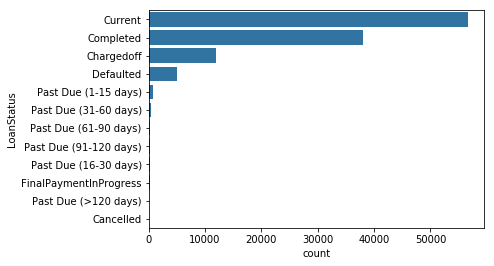

In [5]:
base_color = sb.color_palette()[0]
cat_order = df['LoanStatus'].value_counts().index
sb.countplot(data = df, y = 'LoanStatus', color = base_color, order = cat_order);

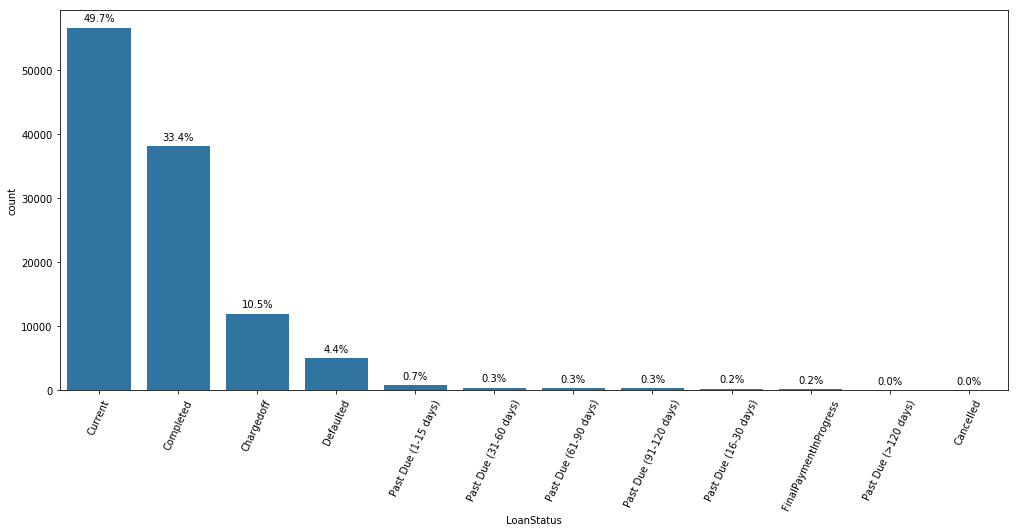

In [11]:
# create the plot
plt.figure(figsize = [17, 7])
plt.xticks(rotation = 65)
base_color = sb.color_palette()[0]
cat_order = df['LoanStatus'].value_counts().index
sb.countplot(data = df, x = 'LoanStatus', color = base_color, order = cat_order)

# add annotations
n_points = df.shape[0]
cat_counts = df['LoanStatus'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print annotation just above top of the bar
    plt.text(loc, count+1000, pct_string, ha = 'center', color = 'black')

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [5]:
(df['LoanOriginalAmount']).describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

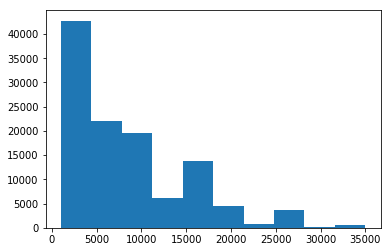

In [6]:
plt.hist(data = df, x = 'LoanOriginalAmount');

#### We can see that the loan amount variable appears to be skewed, but we can try a log transformation to take a look at the distribution again

In [14]:
np.log10(df['LoanOriginalAmount']).describe()

count    113937.000000
mean          3.795130
std           0.345610
min           3.000000
25%           3.602060
50%           3.812913
75%           4.079181
max           4.544068
Name: LoanOriginalAmount, dtype: float64

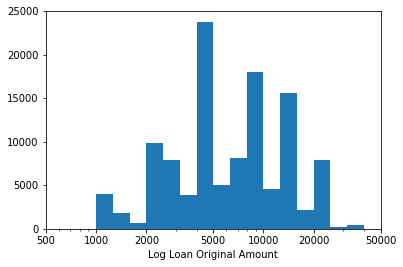

In [15]:
bin_edges = 10 ** np.arange(2.9, np.log10(df['LoanOriginalAmount'].max())+0.1, 0.1)
plt.hist(df['LoanOriginalAmount'], bins = bin_edges)
plt.xscale('log')
plt.xlabel('Log Loan Original Amount')
tick_locs = [500, 1000, 2000, 5000, 10000, 20000, 50000]
plt.xticks(tick_locs, tick_locs);

#### Another feature of interest is the borrowerAPR, since we want to know what variables seem to influence it, it can be a good idea to take a look at its distribution via a histogram

In [20]:
df['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

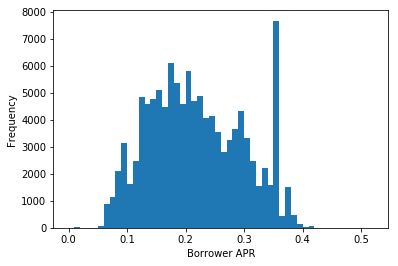

In [33]:
bin_edges = np.arange(0, (df['BorrowerAPR'].max())+0.01, 0.01)
plt.hist(data = df, x = 'BorrowerAPR', bins = bin_edges);
plt.xlabel('Borrower APR')
plt.ylabel('Frequency');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We can see from the frequency distribution of the "LoanStatus" variables that the majority of the loans that were given out were either succesfully repaid, or the payments were being kept up with. These two categories of loan I think of as a "successful" loan.

> For our "LoanOriginalAmount" variable, we can see that most of the loans are given out at sort of "round" number locations (ex.. 2000, 5000, 10000). This sort of makes sense since people tend to prefer some nice round numbers.

> We can also see from our "BorrowerAPR" variable, that the APR's that are issued are mostly normally distributed, but with a high spike around 0.36, this could mean that this is a default APR to fall back on, or maybe they had some sort of a promised APR rate from a sale or something like that.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I was suprised that so many loans seemed to be succesfull, I did tidy up the graphs a bit by plotting absolute frequency and relative frequency so that I could see how much of the whole was what I termed as succesfull, as well as changing the scale of the loan amount to a log10 so that I could see the distribution of the data a little bit better.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

> In this section we will be investigating the relationship between our "LoanOriginalAmount" variable and the "LoanStatus, so that we can see if there is an interesting relationship between how much a loan is given out for and what the outcome of that loan is.

> We will also be taking a look at some correlations between the "LoanSuccess" variable that we will encode based on our "LoanOriginalAmount" and "LoanStatus" variables and the other variables in the dataset so that we can see if there are any good predictors of the success of a loan. We will do something similar for our "BorrowerAPR" variable so that we can see what features of a credit history this company uses to determine the APR for a loan that they give out.

#### First we want to plot the LoanStatus by Loan amount using a facetgrid to take a look at the  relationships

In [16]:
np.log10(df['LoanOriginalAmount'].describe())

count    5.056665
mean     3.921011
std      3.795588
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

In [6]:
df['log_LoanAmount'] = np.log10(df['LoanOriginalAmount'])

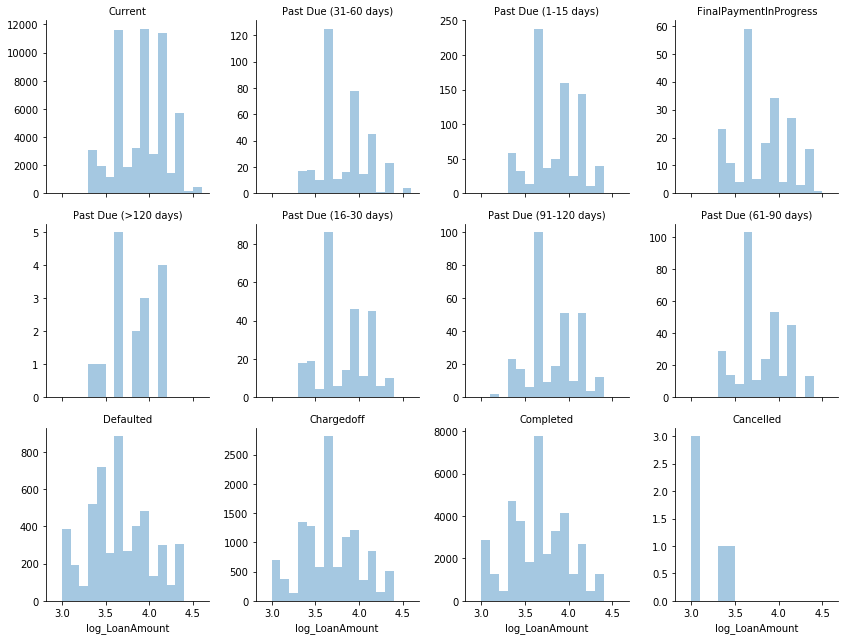

In [18]:
group_means = df.groupby(['LoanStatus']).mean()
group_order = group_means.sort_values(['LoanOriginalAmount'], ascending = False).index
g = sb.FacetGrid(data = df, col = 'LoanStatus', col_wrap = 4, height = 3, col_order = group_order, sharey = False)
g.map(sb.distplot, 'log_LoanAmount', bins = np.arange(2.9, np.log10(df['LoanOriginalAmount'].max())+0.1, 0.1), kde=False)
g.set_titles('{col_name}');

#### Next we want to transform the LoanStatus variable into what will we term a "sucessful" loan vs an "unsucessful" loan so that we have slightly less categories in our plot

In [8]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [7]:
# we will use a dictionary to set up the transformation
cat_dict = {"Sucessful": ['Current', 'Completed','FinalPaymentInProgress', 'Cancelled'], 
            "Fail": ['Chargedoff', 'Defaulted', 'Past Due (1-15 days)', 'Past Due (31-60 days)', 
                            'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (16-30 days)', 
                            'Past Due (>120 days)']}
cat_list = {v: k for k,vv in cat_dict.items() for v in vv}
cat_list

{'Current': 'Sucessful',
 'Completed': 'Sucessful',
 'FinalPaymentInProgress': 'Sucessful',
 'Cancelled': 'Sucessful',
 'Chargedoff': 'Fail',
 'Defaulted': 'Fail',
 'Past Due (1-15 days)': 'Fail',
 'Past Due (31-60 days)': 'Fail',
 'Past Due (61-90 days)': 'Fail',
 'Past Due (91-120 days)': 'Fail',
 'Past Due (16-30 days)': 'Fail',
 'Past Due (>120 days)': 'Fail'}

In [8]:
df['LoanSucess'] = df['LoanStatus'].map(cat_list)

In [9]:
df['LoanSucess'].value_counts()

Sucessful    94860
Fail         19077
Name: LoanSucess, dtype: int64

In [10]:
random_samp = df.sample(10000).copy()

c:\users\yarr\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


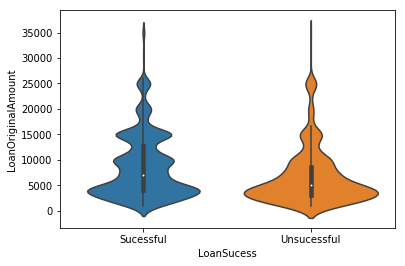

In [14]:
sb.violinplot(data = random_samp, x = 'LoanSucess', y = 'LoanOriginalAmount');

In [12]:
random_samp['LoanSuccessEncoded'] = np.where(random_samp['LoanSucess'].str.contains('Fail'), 0, 1)

In [13]:
random_samp['LoanSuccessEncoded'].value_counts()

1    8327
0    1673
Name: LoanSuccessEncoded, dtype: int64

In [14]:
random_samp.reset_index()

,index,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,log_LoanAmount,LoanSucess,LoanSuccessEncoded
0,50379,399135708752545697AD3C6,711261,2013-02-08 15:27:27.153000000,NaN,60,Current,NaN,0.09561,0.0740,...,0.00,0.00,1.0,0,0,0.0,301,4.176091,Sucessful,1
1,41134,13E236010109839141FEC36,1142844,2014-01-15 22:20:07.827000000,NaN,36,Current,NaN,0.12691,0.0990,...,0.00,0.00,1.0,0,0,0.0,1,4.146128,Sucessful,1
2,84536,E68A357524038758839B1C7,736705,2013-03-24 21:51:06.193000000,NaN,60,Current,NaN,0.13942,0.1169,...,0.00,0.00,1.0,0,0,0.0,68,3.602060,Sucessful,1
3,39641,8F8836045471837860AFFB0,1207373,2014-02-25 17:26:11.543000000,NaN,60,Current,NaN,0.18426,0.1605,...,0.00,0.00,1.0,0,0,0.0,1,4.000000,Sucessful,1
4,103724,80C235896699644397B7CE6,939693,2013-09-29 17:55:14.373000000,NaN,60,Current,NaN,0.25625,0.2310,...,0.00,0.00,1.0,0,0,0.0,1,4.000000,Sucessful,1
5,55067,76CE3592441250587477A1E,960788,2013-10-17 15:50:35.387000000,NaN,36,Current,NaN,0.33215,0.2925,...,0.00,0.00,1.0,0,0,0.0,4,3.602060,Sucessful,1
6,60399,C38A35988672153288C3817,1105942,2014-01-13 14:18:22.093000000,NaN,36,Current,NaN,0.12081,0.0930,...,0.00,0.00,1.0,0,0,0.0,1,3.698970,Sucessful,1
7,48517,FD9D359492836040450E61D,1060452,2013-11-27 14:20:29.743000000,NaN,60,Current,NaN,0.13227,0.1099,...,0.00,0.00,1.0,0,0,0.0,214,4.176091,Sucessful,1
8,113424,D7003599953557779C1E8FC,1123455,2014-01-07 19:34:41.517000000,NaN,60,Current,NaN,0.13227,0.1099,...,0.00,0.00,1.0,0,0,0.0,1,4.243038,Sucessful,1
9,92861,26BD358623742611651CDBA,870579,2013-08-15 11:38:00.960000000,NaN,36,Current,NaN,0.15324,0.1249,...,0.00,0.00,1.0,0,0,0.0,172,4.176091,Sucessful,1


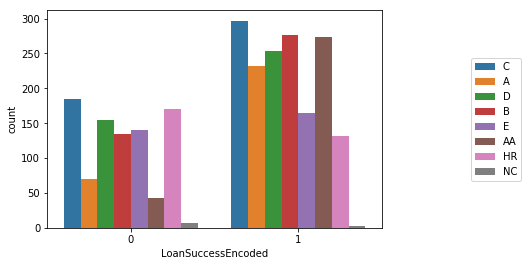

In [15]:
sb.countplot(data = random_samp, x = 'LoanSuccessEncoded', hue = 'CreditGrade')
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [16]:
tempp = random_samp[random_samp.columns[:]].corr()['LoanSuccessEncoded'][:]
terr = tempp.loc[abs(tempp) > 0.3]
terr

ListingNumber                 0.349043
LoanCurrentDaysDelinquent    -0.730151
LoanMonthsSinceOrigination   -0.342733
LoanNumber                    0.350530
LP_GrossPrincipalLoss        -0.648321
LP_NetPrincipalLoss          -0.639279
LoanSuccessEncoded            1.000000
Name: LoanSuccessEncoded, dtype: float64

In [17]:
apr_corr = df[df.columns[:]].corr()['BorrowerAPR'][:]
apr_temp = apr_corr.loc[abs(apr_corr) > 0.4]
apr_corr_sorted = apr_temp.sort_values(ascending=False)
apr_corr_sorted

BorrowerAPR                1.000000
BorrowerRate               0.989824
LenderYield                0.989329
EstimatedLoss              0.949538
EstimatedEffectiveYield    0.895635
EstimatedReturn            0.794275
CreditScoreRangeUpper     -0.429707
CreditScoreRangeLower     -0.429707
ProsperScore              -0.668287
ProsperRating (numeric)   -0.962151
Name: BorrowerAPR, dtype: float64

c:\users\yarr\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


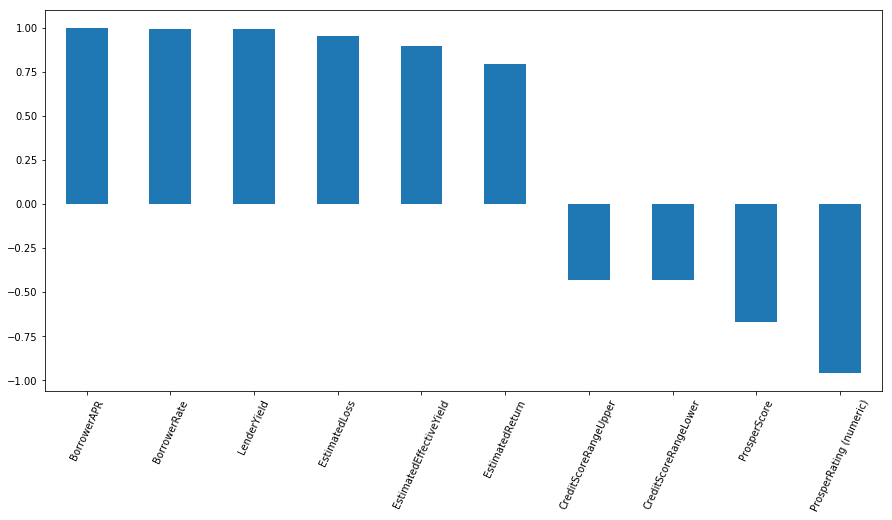

In [18]:
plt.figure(figsize = [15, 7])
apr_corr_sorted.plot(kind='bar', color = base_color)
plt.xticks(rotation = 65);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Some relationships I observed within this dataset relating to the main features I was interested in (LoanSuccess and BorrowerAPR) were not what I expected. I thought there would be more clear cut relationships with variables relating to the success of a loan, but I mostly found some predictors that the loan would fail but only after it had already been issued, since there was a relationship between "LoanCurrentDaysDelinquent" and the failure of a loan. There was also a strongish relationship between the failure of the loan and the "LP_GrossPrincipalLoss", as well as "LP_NetPrincipalLoss". This is less helpful to the loaning institution since these variables occur after the loan is issued and are a signal that they have given up and recovering the loan amount.

> Additionally I thought it was interesting to observe via the violin plot of LoanSuccess and LoanOriginalAmount, most of the unsuccessful loans were for relatively small amounts at least compared to the number of loans that were successful and the amounts those were for.

> The BorrowerAPR variable had some more interesting things going on, as it signaled to me that this lending institution has developed a fairly successful predictor of whether or not the loan will be successful. Due to the negative relationship between APR and the "CreditScoreRange, ProsperRating" variables we can see that if the prosper rating is low, or the credit score is low the APR will be high, indicating that they are charging a high yearly amount to make up for the risky nature of the loan.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I think it is very interesting that there was such a high correlation between the APR and the "LenderYield" variable. This indicates to me that the lender might intentionally issue a risky loan with a high APR, because they will still make a lot of money on the loan.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

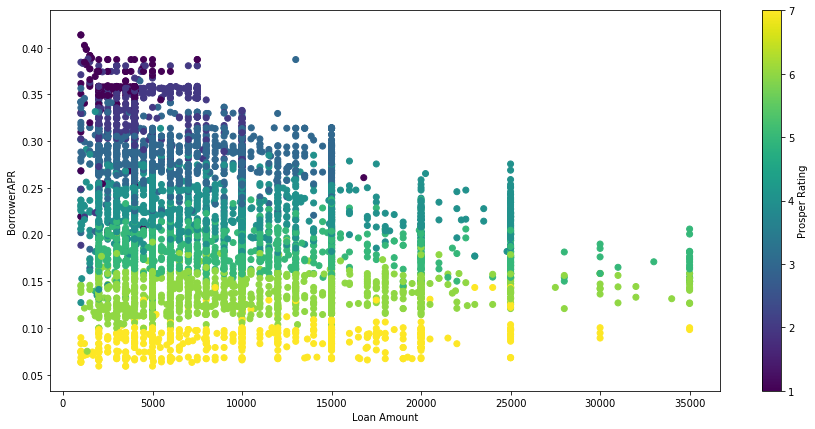

In [21]:
plt.figure(figsize = [15, 7])
plt.scatter(data = random_samp, x = random_samp['LoanOriginalAmount'], y = random_samp['BorrowerAPR'], c = random_samp['ProsperRating (numeric)'])
plt.colorbar().set_label(label = 'Prosper Rating')
plt.ylabel('BorrowerAPR')
plt.xlabel('Loan Amount');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!